In [19]:
pip install openpyxl


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.font_manager
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
import openpyxl
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [4]:
df1 = pd.read_excel('/Users/SAMSUNG/화물차 사고 저감 방안/2021년 차종별 도로종류별 교통사고.xlsx')

In [5]:
df1

,가해운전자 차종별,사고년도,합계,일반국도,지방도,특별광역시도,시군도,고속국도,기타
0,합계,사고건수,203130,18983,13991,80105,72343,4883,12825
1,합계,사망자수,2916,524,341,667,1042,191,151
2,합계,부상자수,291608,29792,21277,110595,103125,9708,17111
3,승용차,사고건수,132440,12073,9052,52798,47947,2978,7592
4,승용차,사망자수,1348,269,175,317,471,74,42
5,승용차,부상자수,195686,19399,14246,75214,70385,6000,10442
6,승합차,사고건수,9923,936,603,4033,3599,173,579
7,승합차,사망자수,146,17,8,51,52,12,6
8,승합차,부상자수,14510,1499,990,5457,5209,479,876
9,화물차,사고건수,26081,3240,2279,7988,9534,1328,1712


In [6]:
df1.drop(['합계'], axis=1, inplace = True)
df1

,가해운전자 차종별,사고년도,일반국도,지방도,특별광역시도,시군도,고속국도,기타
0,합계,사고건수,18983,13991,80105,72343,4883,12825
1,합계,사망자수,524,341,667,1042,191,151
2,합계,부상자수,29792,21277,110595,103125,9708,17111
3,승용차,사고건수,12073,9052,52798,47947,2978,7592
4,승용차,사망자수,269,175,317,471,74,42
5,승용차,부상자수,19399,14246,75214,70385,6000,10442
6,승합차,사고건수,936,603,4033,3599,173,579
7,승합차,사망자수,17,8,51,52,12,6
8,승합차,부상자수,1499,990,5457,5209,479,876
9,화물차,사고건수,3240,2279,7988,9534,1328,1712


In [7]:
df2 = df1.iloc[9:12,1:10]
df2

,사고년도,일반국도,지방도,특별광역시도,시군도,고속국도,기타
9,사고건수,3240,2279,7988,9534,1328,1712
10,사망자수,133,88,111,230,88,37
11,부상자수,5241,3472,10892,13534,2567,2346


In [8]:
df3 = df2.transpose()
df3

,9,10,11
사고년도,사고건수,사망자수,부상자수
일반국도,3240,133,5241
지방도,2279,88,3472
특별광역시도,7988,111,10892
시군도,9534,230,13534
고속국도,1328,88,2567
기타,1712,37,2346


In [9]:
df4 = df3.rename(columns=df3.iloc[0])
df5 = df4.iloc[1:,]
df5

,사고건수,사망자수,부상자수
일반국도,3240,133,5241
지방도,2279,88,3472
특별광역시도,7988,111,10892
시군도,9534,230,13534
고속국도,1328,88,2567
기타,1712,37,2346


In [10]:
df6 = df5.reset_index().rename(columns={'index': '도로종류'})
df6

,도로종류,사고건수,사망자수,부상자수
0,일반국도,3240,133,5241
1,지방도,2279,88,3472
2,특별광역시도,7988,111,10892
3,시군도,9534,230,13534
4,고속국도,1328,88,2567
5,기타,1712,37,2346


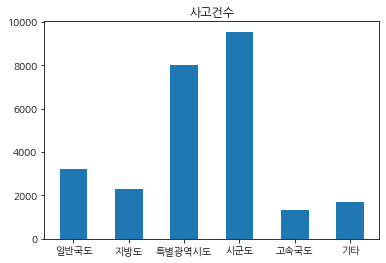

In [11]:
plt.bar(df6["도로종류"], df6["사고건수"], width=0.5)
plt.title('사고건수')
plt.show()

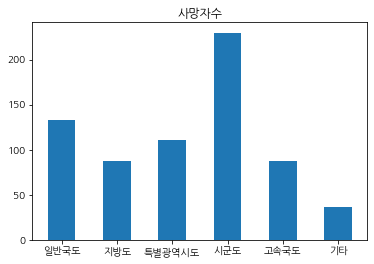

In [12]:
plt.bar(df6["도로종류"], df6["사망자수"], width=0.5)
plt.title('사망자수')
plt.show()

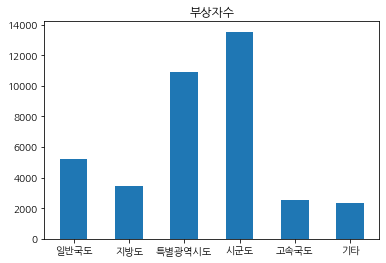

In [13]:
plt.bar(df6["도로종류"], df6["부상자수"], width=0.5)
plt.title('부상자수')
plt.show()

In [14]:
x = df6["도로종류"]
y = df6["사고건수"]
a = df6["사망자수"]
b = df6["부상자수"]

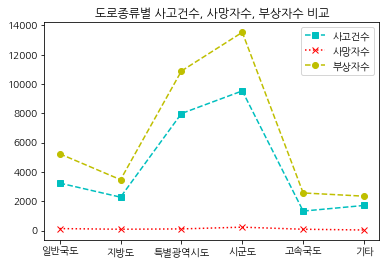

In [15]:
plt.plot(x, y, 'cs--', label = '사고건수') 
plt.plot(x, a, 'rx:', label = '사망자수')
plt.plot(x, b, 'yo--', label = '부상자수')
plt.title("도로종류별 사고건수, 사망자수, 부상자수 비교")
plt.legend() 
plt.show()